## <font color='darkblue'>Preface</font>
In this first Colab, you'll explore linear regression with a simple database. 

### <font color='darkgreen'>Learning objectives:</font>

After doing this exercise, you'll know how to do the following:
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

### <font color='darkgreen'>Import relevant modules</font>
The following cell imports the packages that the program requires:

In [13]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

<a id='sect0'></a>
### <font color='darkgreen'>Agenda</font>
* <font size='3ptx'><b><a href='#sect1'>Define the dataset</a></b></font>
* <font size='3ptx'><b><a href='#sect2'>Model for Linear Regression</a></b></font>
* <font size='3ptx'><b><a href='#sect3'>Hyperparameters tuning</a></b></font>
* <font size='3ptx'><b><a href='#sect4'>Summary of hyperparameter tuning</a></b></font>

<a id='sect1'></a>
## <font color='darkblue'>Define the dataset</font>
The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).

In [4]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

### <font color='darkgreen'>Visualize the dataset</font>
Let's draw the line chart with our dataset:

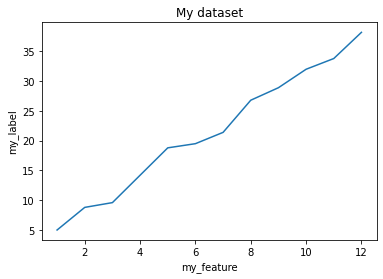

In [5]:
plt.plot(my_feature, my_label)
plt.title('My dataset')
plt.xlabel('my_feature')
plt.ylabel('my_label')
plt.show()

<a id='sect2'></a>
## <font color='darkblue'>Model for Linear Regression</font> ([back](#sect0))
Below we will build a model to do the <b><a href='https://en.wikipedia.org/wiki/Linear_regression'>linear regression</a></b>. Firstly, we will define functions for our convenience in training/explaining the model:

### <font color='darkgreen'>Define functions that build and train a model</font>
The following code defines two functions:
  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

In [10]:
def build_model(learning_rate):
  """Create and compile a simple linear regression model.
  
  Args:
    learning_rate: The learning rate of optimizer.
    
  Returns:
    The built model.
  """
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size, verbose=0):
  """Train the model by feeding it data.
  
  Args:
    model: The ML model.
    feature: The input feature.
    label: The output label.
    epochs: The number of round to train the model.
    batch_size: The number of accumulated input feature to update the model's weighting.
    
  Return:
    trained_weight, trained_bias, epochs, rmse
  """

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=verbose)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


### <font color='darkgreen'>Define plotting functions</font>
We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  A plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  A [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

In [43]:
def plot_the_result(trained_weight, trained_bias, feature, label, epochs, rmse):
  plt.rcParams['figure.figsize'] = [12, 4]
  figure, axis = plt.subplots(1, 2)
  
  plot_the_model(axis[0], trained_weight, trained_bias, feature, label)
  plot_the_loss_curve(axis[1], epochs, rmse)
  
  # Render the scatter plot and the red line.
  plt.show()
  
def plot_the_model(subplot, trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label.
  
  Args:
    subplot: The sub plot created in matplotlib
    trained_weight: Weightings learned by model.
    trained_bias: Bias learned by model.
    feature: Input feature
    label: Output label
  """

  # Label the axes.
  subplot.set_xlabel("feature")
  subplot.set_ylabel("label")

  # Plot the feature values vs. label values.
  subplot.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  subplot.plot([x0, x1], [y0, y1], c='r')

  
def plot_the_loss_curve(subplot, epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch.
  
  Args:
    subplot: The sub plot created in matplotlib
    epochs: Epochs
    rmse: RMSE (Root mean square error) collected during model training.
  """
  subplot.set_xlabel("Epoch")
  subplot.set_ylabel("Root Mean Squared Error")

  subplot.plot(epochs, rmse, label="Loss")
  subplot.legend()
  #subplot.set_ylim([rmse.min()*0.97, rmse.max()])

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### <font color='darkgreen'>Specify the hyperparameters</font>
The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

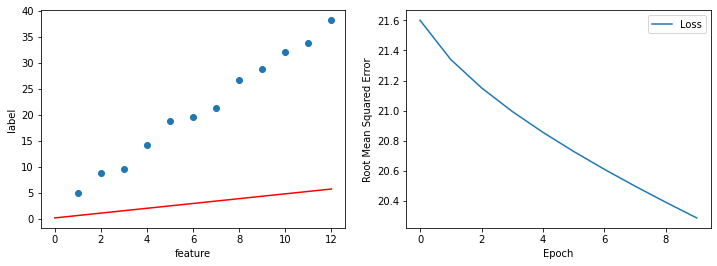

In [45]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_result(trained_weight, trained_bias, my_feature, my_label, epochs, rmse)

<a id='sect3'></a>
## <font color='darkblue'>Hyperparameters tuning</font> ([back](#sect0))
* <font size='3ptx'><b><a href='#sect3_1'>Task 1: Examine the graphs</a></b></font>
* <font size='3ptx'><b><a href='#sect3_2'>Task 2: Increase the number of epochs</a></b></font>
* <font size='3ptx'><b><a href='#sect3_3'>Task 3: Increase the learning rate</a></b></font>
* <font size='3ptx'><b><a href='#sect3_4'>Task 4: Find the ideal combination of epochs and learning rate</a></b></font>
* <font size='3ptx'><b><a href='#sect3_5'>Task 5: Adjust the batch size</a></b></font>

<a id='sect3_1'></a>
### <font color='darkgreen'>Task 1: Examine the graphs</font>

Examine the left graph. The blue dots identify the actual data; the red line identifies the output of the trained model. **Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.**

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the right graph, which shows the loss curve. **Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.**

<a id='sect3_2'></a>
### <font color='darkgreen'>Task 2: Increase the number of epochs</font>

**Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady** (<font color='brown'>zero slope or nearly zero slope</font>), **which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).**

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  **Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.**

Examine the loss curve. Does the model converge?

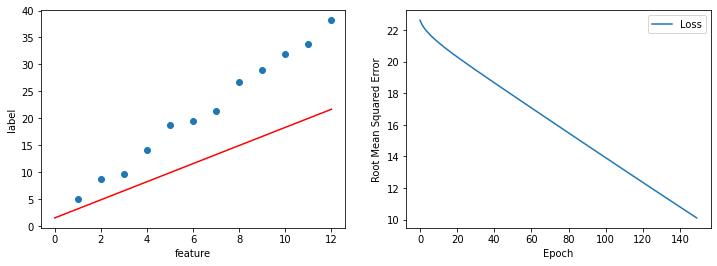

In [50]:
learning_rate=0.01
epochs= 150 
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
  my_model, my_feature, my_label, epochs, my_batch_size)

plot_the_result(trained_weight, trained_bias, my_feature, my_label, epochs, rmse)

<a id='sect3_3'></a>
### <font color='darkgreen'>Task 3: Increase the learning rate</font>

In Task 2, you increased the number of epochs to get the model to converge. **Sometimes, you can get the model to converge more quickly by increasing the <font color='violet'>learning rate</font>. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.**

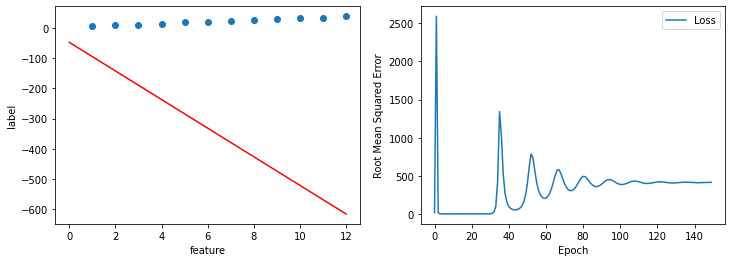

In [51]:
learning_rate=100
epochs= 150 
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
  my_model, my_feature, my_label, epochs, my_batch_size)

plot_the_result(trained_weight, trained_bias, my_feature, my_label, epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

<a id='sect3_4'></a>
### <font color='darkgreen'>Task 4: Find the ideal combination of epochs and learning rate</font>

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

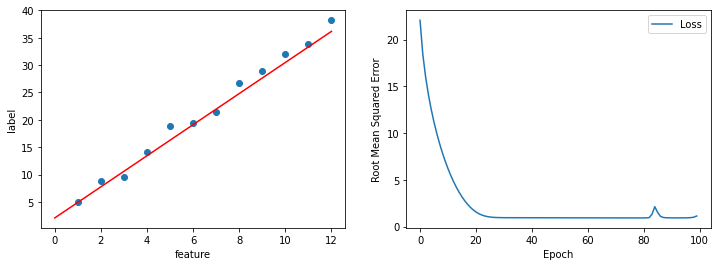

In [52]:
learning_rate=0.14
epochs= 100
my_batch_size= 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
  my_model, my_feature, my_label, epochs, my_batch_size)

plot_the_result(trained_weight, trained_bias, my_feature, my_label, epochs, rmse)

<a id='sect3_5'></a>
### <font color='darkgreen'>Task 5: Adjust the batch size</font>

**The system recalculates the model's loss value and adjusts the model's weights and bias after each `iteration`.  Each iteration is the span in which the system processes one batch. For example, if the `batch size` is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.**

**One `epoch` spans sufficient iterations to process every example in the dataset**. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (<font color='brown'>12, in this case</font>). However, **the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.**

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

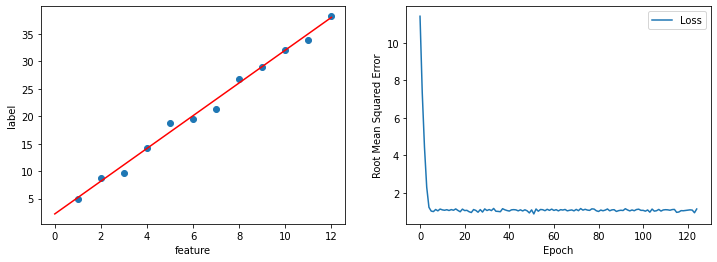

In [53]:
learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_result(trained_weight, trained_bias, my_feature, my_label, epochs, rmse)

<a id='sect4'></a>
## <font color='darkblue'>Summary of hyperparameter tuning</font> ([back](#sect0))

<font size='3ptx'><b>Most machine learning problems require a lot of hyperparameter tuning</b></font>.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  <b>You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:</b>

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.